# Статистика, DS-поток
## Задание SP.5

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Баллы за задание:**

* Задача 1 &mdash;  80 баллов
* Задача 2 &mdash;  50 баллов
* Задача 3 &mdash;  150 баллов

**Важность задач:**

* *высокая:* задача 1, 2;
* *средне-высокая:* задача 3.

Степень важности задач не связана с количеством баллов и определяется только на основе оценки полезности задачи с точки зрения усвоения текущего и дальнейшего материала. Например, если вы что-то не успеваете, рекомендуется в первую очередь выполнять более важные задачи.


In [ ]:
# Bot check

# HW_ID: ds_sp5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5, palette='Set2')

-----

## Задача 1.
Пусть $\widehat{\theta}$ &mdash; оценка параметра $\theta$ и $\textrm{MSE}_{\widehat{\theta}} (\theta) = \mathsf{E}_{\theta} \left(\widehat{\theta} - \theta\right)^2$ &mdash; среднеквадратичная ошибка оценки $\widehat{\theta}$. Тогда справедливо bias-variance разложение:
$$\textrm{MSE}_{\widehat{\theta}} (\theta) = \textrm{bias}_{\widehat{\theta}}^2(\theta) + \textrm{var}_{\widehat{\theta}} (\theta)$$
$$\textrm{bias}_{\widehat{\theta}} (\theta) = \mathsf{E}_{\theta} \widehat{\theta} - \theta; $$
$$\textrm{var}_{\widehat{\theta}} (\theta) = \mathsf{D}_{\theta} \widehat{\theta}.$$

*a).* Пусть $X = (X_1, \dots, X_n)$ &mdash; выборка из распределения $U[0, \theta]$. Рассмотрим класс оценок $\mathcal{K} = \left\{c_n X_{(n)}, c_n\in\mathbb{R}\right\}$. Выпишите формулы bias-variance разложения для таких оценок.

**Ответ:**

$$
\mathrm{bias}_{\hat{\theta}}(\theta)=\mathsf{E}_\theta [c_nX_{(n)}]-\theta=c_n\mathsf{E}_\theta X_{(n)}-\theta=\frac{c_nn\theta}{n+1}-\theta
$$

$$
\mathrm{var}_{\hat{\theta}}\theta=\mathsf{D}_\theta[c_nX_{(n)}]=c_n^2 \mathsf{D}_\theta X_{(n)}=\frac{c_n^2 n\theta^2}{(n+1)^2(n+2)}
$$

$$
MSE_{\hat{\theta}}(\theta)=\theta^2\left[\frac{c_n^2 n^2}{(n+1)^2}\left(1+\frac{1}{n(n+2)}\right)-\frac{2c_n n}{n+1}+1\right]
$$

Заметим, что каждая компонента bias-variance разложения пропорциональна $\theta^2$. Это означает, достаточно рассмотреть поведение компонент при изменении $c$ только для одного значения $\theta$.

Постройте график зависимости компонент bias-variance разложения от $c$ для $n=5$ и $\theta=1$. С помощью функций `plt.xlim` и `plt.ylim` настройте видимую область графика так, чтобы четко была отображена информативная часть графика (по оси *x* примерно от `0.9` до `1.4`). Не забудьте добавить сетку и легенду, а также подписать оси.

На графике проведите вертикальные линии с координатами $c$, соответствующими минимуму функции риска, несмещенной оценке и ОМП.

Сделайте выводы. Какое значение $c_n$ дает минимум функции риска? Каково поведение компонент разложения? Как соотносятся полученные оценки?

**Решение:**

Минимум функции риска достигается в вершине параболы:

$$
{(c_n)}_\mathrm{min} = \frac{\frac{2n}{n+1}}{\frac{2n^2}{(n+1)^2}\left(1+\frac{1}{n(n+2)}\right)}=\frac{n+1}{n\frac{n^2+2n+1}{n(n+2)}}=\frac{n+2}{n+1}
$$

Несмещённая оценка даёт нулевой bias:

$$
\frac{c_n n}{n+1}-1=0\Rightarrow {(c_n)}_\text{несмещ}=\frac{n+1}{n}
$$

ОМП:

$$
l_X(c_n)=-n(\ln c_n+\ln X_{(n)})\Rightarrow l_X'(c_n)=-\frac{n}{c_n}
$$

Нуль не достигается, и функция убывает, значит, исходя из того, что $\hat{\theta}\ge X_{(n)}$, выбираем $c_n=1$

<b><font color="#00b565" size="5">Исправил код</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> На графиках не изображено само MSE. Комм. Из-за этого не ясно, где минимум.

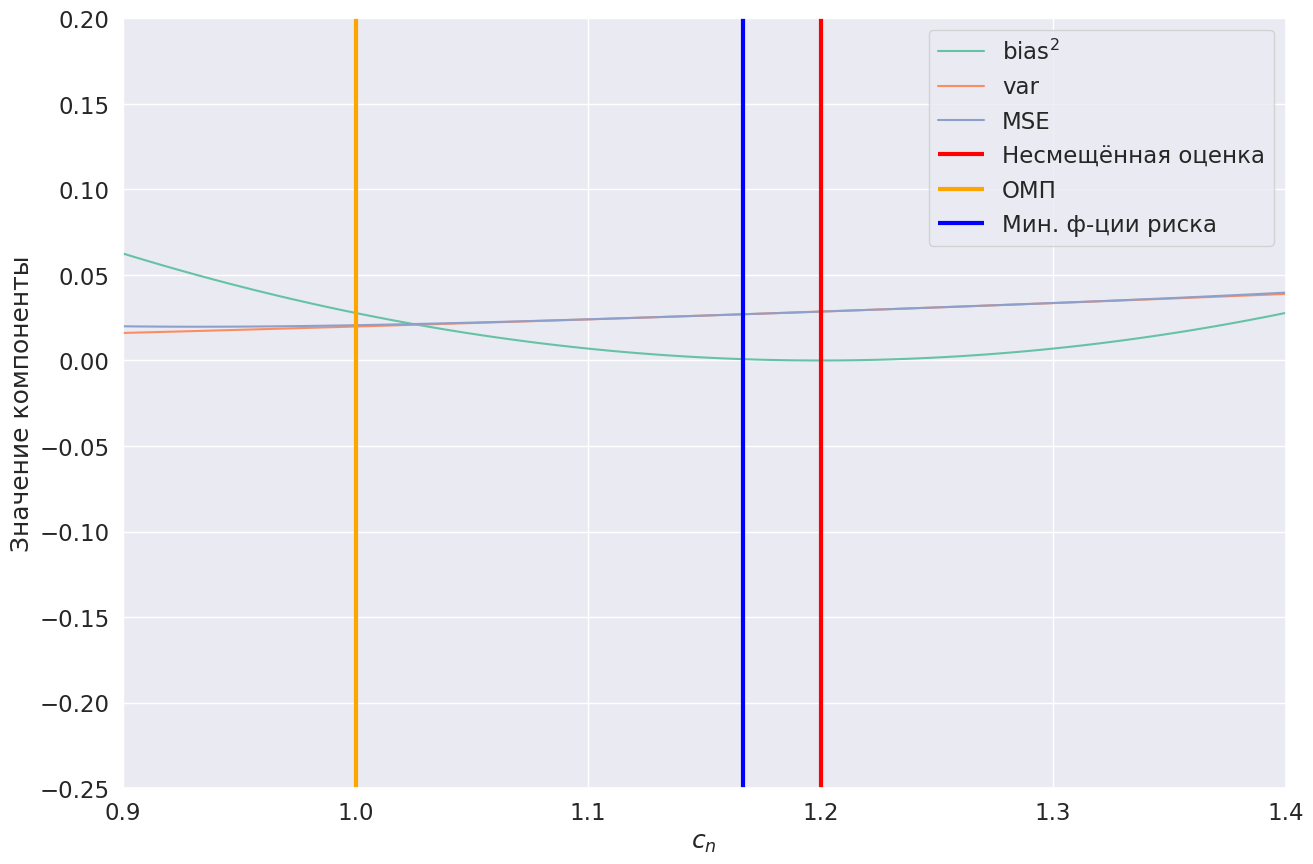

In [3]:
n = 5
theta = 1.0

c = np.linspace(0.9, 1.4, 100)
bias = theta ** 2 * (c ** 2 * n ** 2 / (n + 1) ** 2 - 2 * c * n / (n + 1) + 1)
var = c ** 2 * n * theta ** 2 / ((n + 1) ** 2 * (n + 2))

plt.figure(figsize=(15, 10))

plt.plot(c, bias, label='$\mathrm{bias}^2$')
plt.plot(c, var, label='var')
plt.plot(c, bias ** 2 + var, label='MSE')

plt.vlines((n + 1) / n, -0.25, 0.2, color='red', lw=3, label='Несмещённая оценка')
plt.vlines(1, -0.25, 0.2, color='orange', lw=3, label='ОМП')
plt.vlines((n + 2) / (n + 1), -0.25, 0.2, color='blue', lw=3, label='Мин. ф-ции риска')

plt.xlim((0.9, 1.4))
plt.ylim((-0.25, 0.2))
plt.xlabel('$c_n$')
plt.ylabel('Значение компоненты')
plt.legend()
plt.show()

<b><font color="#00b565" size="5">===== Конец исправлений =====</font></b>

**Вывод:** Компонента variance всё время возрастает при положительных $c_n$. Компонента bias убывает, пока не достигает 0 в точке, где оценка несмещённая, после чего вновь возрастает. Минимум функции риска достигается при $c_n=\frac{n+2}{n+1}$

*b).* Пусть $X = (X_1, \dots, X_n)$ &mdash; выборка из распределения $\mathcal{N}(a, \sigma^2)$, где $a$ и $\sigma$ неизвестны. Для величины $\sigma^2$ рассмотрим класс оценок $\mathcal{K} = \left\{\frac{1}{c_n}\sum\limits_{i=1}^n \left(X_i - \overline{X}\right)^2, \; c_n \in\mathbb{R}\right\}$. Выпишите формулы bias-variance разложения для таких оценок.

<b><font color="#00b565" size="5">Исправил выводы</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> Получена неправильная формула для оптимального c или она находилась при помощи argmin по массиву. Комм. Посчитана константа, при которой достигается наилучшая по MSE оценка, не теоретически, а argmin по массиву. Инд. комм. mse минимизирует n+1, это видно было бы на графиках, если бы нарисовали mse

**Ответ:**

$$
\mathrm{bias}_{\hat{\theta}}(\sigma^2)=\mathsf{E}_\theta \left[\frac{1}{c_n}\sum_{i=1}^n (X_i-\overline{X})^2\right]-\sigma^2=\sigma^2\left(\frac{n-1}{c_n}-1\right)
$$

$$
\mathrm{var}_{\hat{\theta}}(\sigma^2)=\mathsf{D}_\theta\left[\frac{1}{c_n}\sum_{i=1}^n (X_i-\overline{X})^2\right]=\frac{1}{c_n^2}\mathsf{D}_\theta\left[\sum_{i=1}^n(X_i-\overline{X})^2\right]=\frac{2\sigma^4 (n - 1)}{c_n^2}
$$

$$
\mathrm{MSE}_{\hat{\theta}}(\sigma^2)=\sigma^4\left(\frac{n^2-1}{c_n^2}-\frac{2(n-1)}{c_n}+1\right)
$$

<b><font color="#00b565" size="5">===== Конец исправлений =====</font></b>

Повторите исследование, аналогичное пункту *a)* для $a = 0, \sigma^2 = 1$ и $n \in \{5, 10\}$. Для экономии места нарисуйте два графика рядом с помощью функции `plt.subplot`. Не забудьте сделать выводы.

**Решение:**

Несмещённую оценку получим при $c_n=n-1$.

MSE минимизиует значение:

$$
\frac{1}{c_n}=\frac{2(n-1)}{2(n^2-1)}=n+1
$$

ОМП:

$$
l_X(a,\sigma^2)=-\frac{1}{2}\ln(2\pi\sigma^2)-\frac{1}{2}\sum_{i=1}^n \frac{(X_i-\overline{X})^2}{\sigma^2}\Rightarrow \frac{\partial l_X}{\partial\sigma^2}=-\frac{1}{2\sigma^2}-\frac{1}{2}\sum_{i=1}^n \frac{(X_i-\overline{X})^2}{\sigma^4}\Rightarrow \sigma^2=\frac{1}{n}\sum_{i=1}^n (X_i-\overline{X})^2\Rightarrow c_n=n
$$

<b><font color="#00b565" size="5">Исправил код</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> На графиках не изображено само MSE. Комм. Из-за этого не ясно, где минимум.

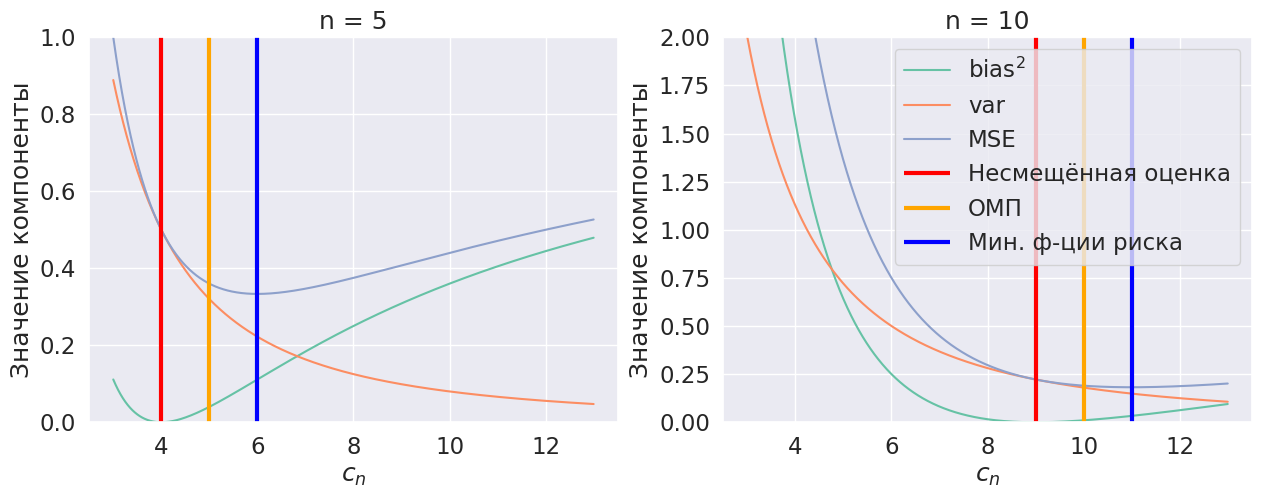

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
c = np.linspace(3, 13, 1000)

for i, n in enumerate([5, 10]):
    bias = ((n - 1) / c - 1) ** 2
    var = 2 * (n - 1) / c ** 2
    mse = bias + var
    ax[i].plot(c, bias, label='$\mathrm{bias}^2$')
    ax[i].plot(c, var, label='var')
    ax[i].plot(c, mse, label='MSE')
    ax[i].vlines(n - 1, 0.0, 2, color='red', lw=3, label='Несмещённая оценка')
    ax[i].vlines(n, 0.0, 2, color='orange', lw=3, label='ОМП')
    ax[i].vlines(n + 1, 0.0, 2, color='blue', lw=3, label='Мин. ф-ции риска')
    ax[i].set_ylim((0, n / 5))
    ax[i].set_xlabel('$c_n$')
    ax[i].set_ylabel('Значение компоненты')
    ax[i].set_title(f'n = {n}')

plt.legend()
plt.show()

<b><font color="#00b565" size="5">===== Конец исправлений =====</font></b>

**Вывод:** Компонента variance всё время убывает, будучи пропорциональной $\theta^{-2}$. Однако, после точки, соответствующей несмещённой оценке, начинает возрастать компонента bias.

Сделайте вывод по результатам пунктов *a)*, *b)*.

**Общий вывод:** Различные способы нахождения оценок дают различные результаты. Метод ОМП далеко не всегда даёт оптимальную оценку с точки зрения минимизации ошибки, и минимальную ошибку может давать смещённая оценка.



---
## Задача 2.
Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $U[0, \theta]$. Рассмотрим оценки $2\overline{X}, (n+1)X_{(1)}, X_{(1)}+X_{(n)}, \frac{n+1}{n} X_{(n)}$. Вам необходимо сравнить эти оценки в равномерном подходе с квадратичной и линейной функциями потерь, построив графики функций риска при помощи моделирования.

Для каждого $\theta \in (0, 2]$ с шагом $0.01$ сгенерируйте $5000$ независимых выборок $X^1=\left(X^1_1, \dots, X^1_{100} \right), \dots, X^{5000} = \left(X^{5000}_1, \dots, X^{5000}_{100} \right)$ из распределения $U[0, \theta]$.

Рассмотрим одну из перечисленных выше оценок $\widehat{\theta}$. Посчитайте ее значение по каждой выборке. Тем самым, для данного $\theta$ получится $5000$ реализаций этой оценки $\widehat{\theta}_1, ..., \widehat{\theta}_{5000}$, где значение $\widehat{\theta}_j$ посчитано по реализации выборки $X^j$.

Теперь можно оценить функцию риска этой оценки с помощью усреднения
$$\widehat{R}_{\widehat{\theta}}(\theta) = \frac{1}{5000}\sum\limits_{j=1}^{5000} L\left(\widehat{\theta}_j, \theta\right),$$
где $L$ — одна из двух функций потерь: квадратичная $L(x, y)=(x-y)^2$ и линейная $L(x, y)=\left|x-y\right|$.

Для каждого из типов функций потерь постройте свой график. Нанесите на этот график для каждой из четырех оценок $\widehat{\theta}$ оценку функции потерь $\widehat{R}_{\widehat{\theta}}(\theta)$. Ограничение сверху по оси *y* ставьте таким, чтобы графики функции риска с малыми значениями четко различались.

*Совет*: при тестировании кода запускайте его с небольшими размерами данных. Например, используйте 100 реализаций выборок. Финальные результаты получите, поставив требуемые значения размеров данных.

В задаче доспустимо использовать короткие циклы, то есть с малым количествои итераций.

**Решение:**

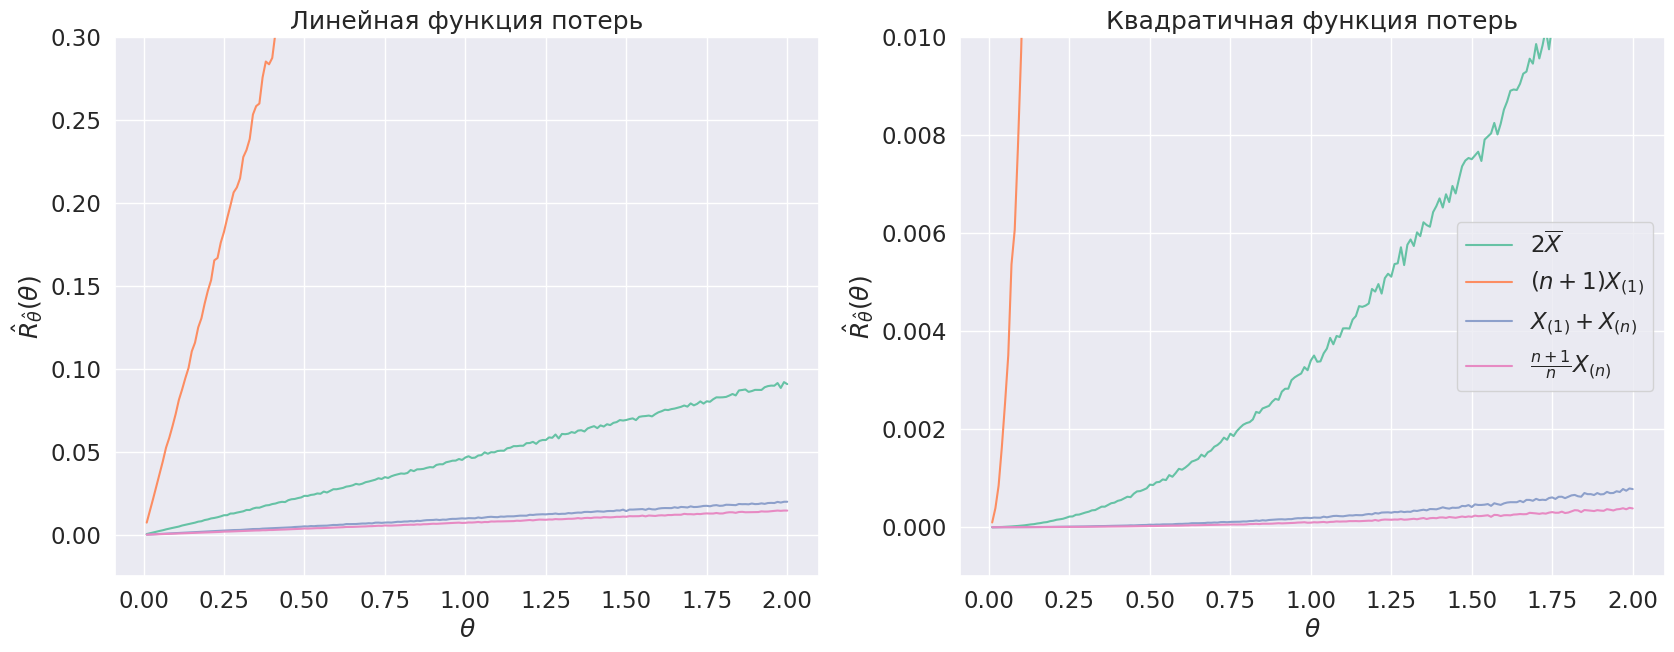

In [86]:
n = 100

risk = {
    'linear': [[], [], [], []],
    'square': [[], [], [], []]
}

for theta in np.arange(0.01, 2.01, 0.01):
    X = np.random.uniform(low=0, high=theta, size=(5000, n))
    est = [
        2 * np.mean(X, axis=1),
        (n + 1) * np.min(X, axis=1),
        np.min(X, axis=1) + np.max(X, axis=1),
        (n + 1) / n * np.max(X, axis=1) 
    ]
    for i, e in enumerate(est):
        risk['linear'][i].append(np.mean(np.abs(e - theta)))
        risk['square'][i].append(np.mean((e - theta) ** 2))

fig, ax = plt.subplots(1, 2, figsize=(20, 7))

est_names = ['$2\overline{X}$', '$(n+1)X_{(1)}$', '$X_{(1)}+X_{(n)}$', '$\\frac{n+1}{n}X_{(n)}$']
for i, est in enumerate(est_names):
    ax[0].plot(np.arange(0.01, 2.01, 0.01), risk['linear'][i], label=est)
    ax[1].plot(np.arange(0.01, 2.01, 0.01), risk['square'][i], label=est)

ax[0].set_xlabel('$\\theta$')
ax[0].set_ylabel('$\hat{R}_\hat{\\theta}(\\theta)$')
ax[0].set_title('Линейная функция потерь')
ax[0].set_ylim((-0.025, 0.3))
ax[1].set_xlabel('$\\theta$')
ax[1].set_ylabel('$\hat{R}_\hat{\\theta}(\\theta)$')
ax[1].set_title('Квадратичная функция потерь')
ax[1].set_ylim((-0.001, 0.01))

plt.legend()
plt.show()

Сделайте вывод о том, какая оценка лучше и в каком подходе.

**Вывод:** в равномерном, в минимаксном и в байесовском подходе оценки расставлены следующим образом в порядке убывания качества: $\frac{n+1}{n}X_{(n)}\succ X_{(1)}+X_{(n)}\succ 2\overline{X}\succ (n+1)X_{(1)}$






---
###  Задача 3.
Пусть $X = \left( X_1, \dots, X_n \right), n = 9$ &mdash; выборка из распределения $Bern(\theta), \theta \in [0, 1]$. При сравнении оценок будем рассматривать среднеквадратичный риск $MSE_{\widehat{\theta}}(\theta) = \mathsf{E}_\theta \left(\widehat{\theta} - \theta\right)^2$

Известно, что оценка $\overline{X}$  параметра сдвига $\theta$ является наилучшей оценкой в среднеквадратичном подходе среди всех несмещенных оценок.
В минимаксном подходе среди всех оценок наилучшей является оценка Ходжеса-Лемана: $\widetilde{\theta} = \overline{X} + \frac{1}{1 + \sqrt{n}} \left(\frac{1}{2} - \overline{X} \right).$
Сравним точность оценок $\overline{X}$ и $\widetilde{\theta}$.

**1.** Нанесите на один график функции риска $MSE_{\overline{X}} (\theta)$ и $MSE_{\widetilde{\theta}} (\theta)$. Численно посчитайте долю тех $\theta$, при которых $MSE_{\widetilde{\theta}} (\theta) < MSE_{\overline{X}} (\theta)$. 

**Решение:**

<b><font color="#00b565" size="5">Исправил код</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> Первый пункт выполнен при помощи сэмплирования вместо формул.

<b><font color="#00b565" size="3">Замечание:</font></b> В первом пункте формулы для MSE стоило выписать явно. . 

Используем формулы с семинаров:

$$
\mathrm{MSE}_{\overline{X}}(\theta)=\frac{\theta(1-\theta)}{n}\qquad \mathrm{MSE}_{\tilde{\theta}}(\theta)=\frac{1}{4(1+\sqrt{n})^2}
$$

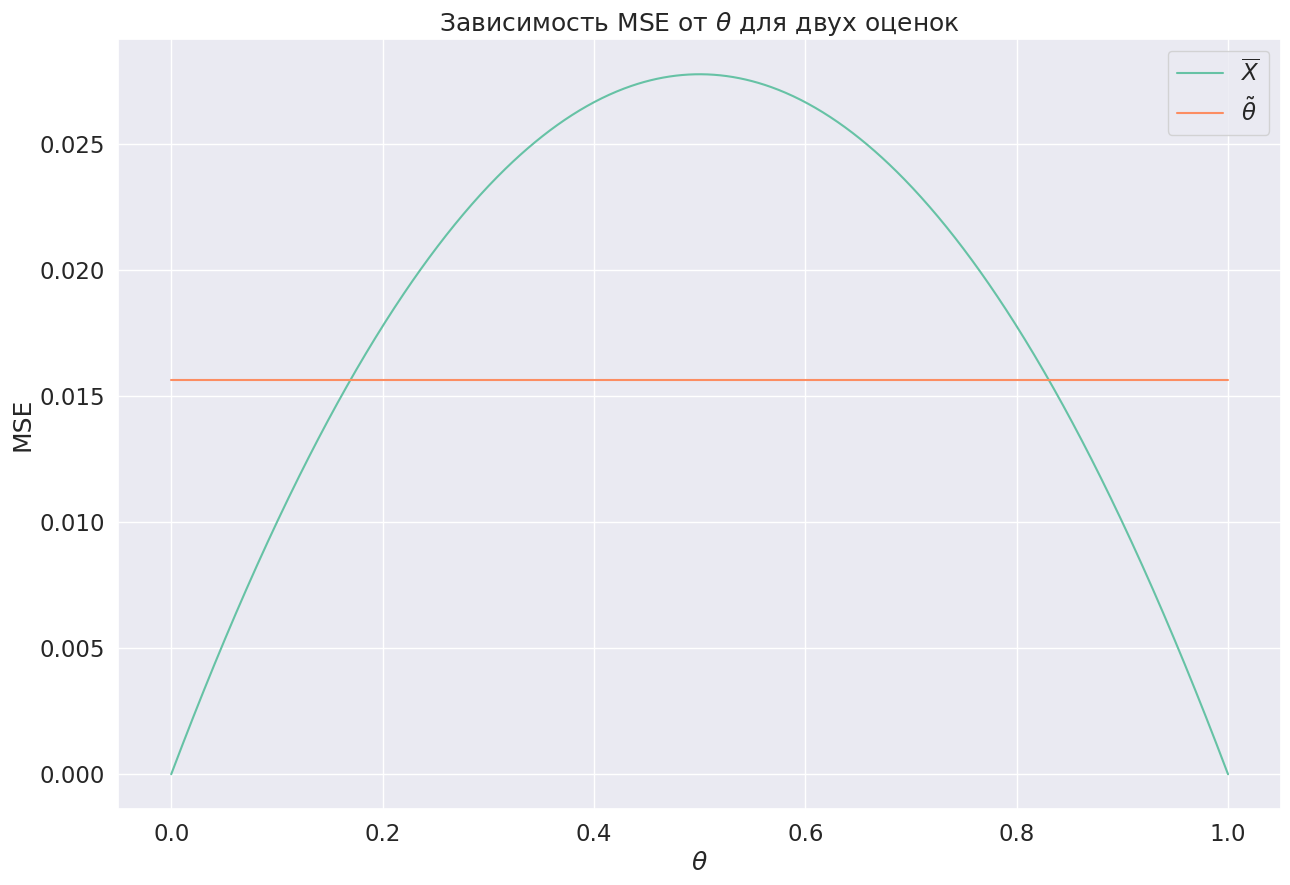

In [50]:
n = 9

thetas = np.linspace(0, 1, 1000)
mse_mean = thetas * (1 - thetas) / n
mse_hoges = [1 / (4 * (1 + np.sqrt(n)) ** 2)] * 1000

plt.figure(figsize=(15, 10))
plt.plot(np.linspace(0, 1, 1000), mse_mean, label='$\overline{X}$')
plt.plot(np.linspace(0, 1, 1000), mse_hoges, label='$\\tilde{\\theta}$')
plt.xlabel('$\\theta$')
plt.ylabel('MSE')
plt.title('Зависимость MSE от $\\theta$ для двух оценок')
plt.legend()
plt.show()

<b><font color="#00b565" size="5">===== Конец исправлений =====</font></b>

In [51]:
low = np.argmin(np.abs(np.array(mse_mean[:500]) - np.array(mse_hoges[:500]))) / 1000
high = (500 + np.argmin(np.abs(np.array(mse_mean[500:]) - np.array(mse_hoges[500:])))) / 1000
print('%.3f' % (high - low))

0.661


**Ответ:** оценка Ходжеса-Лемана оказывается лучше оценки по среднему примерно в 2/3 от возможных значений $\theta$, находящихся вокруг $\frac{1}{2}$

**2.** Проведите эксперимент. Сгенерируйте параметры $\theta = \left( \theta_1, \dots, \theta_{1000} \right)$ из распределения $U[0, 1]$ независимо, после чего сгенерируйте выборки $X_k = \left( X_{k1}, \dots, X_{kn} \right) \sim Bern(\theta_k), \; 1 \leqslant k \leqslant 1000, \; n=9$.

По каждой из выборок $X_k$ вычислите оценки $\overline{X_k}$ и $\widetilde{\theta}_k$ и определите, какая из них ближе к $\theta_k$. В какой доле случаев оценка Ходжеса-Лемана оказалась лучше? Похож ли результат на ответ в прошлом пункте? Почему?

**Решение:**

In [22]:
thetas = np.random.uniform(low=0, high=1, size=1000)

X = []
for theta in thetas:
    X.append(sps.bernoulli(theta).rvs(n))

X = np.array(X)
means = np.mean(X, axis=1)
hoges = means + 1 / (1 + np.sqrt(n)) * (0.5 - means)

hoges_better = np.abs(hoges - thetas) < np.abs(means - thetas)

In [23]:
print(np.mean(hoges_better.astype(float)))

0.518


**Вывод:** В данном случае оценка Ходжеса-Лемана оказалась лучше лишь в половине случаев. Вероятно, это связано с тем, что мы рассматривали для каждой $\theta$ лишь одну выборку и не покрывали весь отрезок $[0;1]$.

**3.**  Рассмотрим функцию $p(\theta) = \mathsf{P}_{\theta} \left(\left|\widetilde{\theta} - \theta \right| < \left| \overline{X} - \theta \right| \right)$ &mdash; вероятность того, что оценка $\widetilde{\theta}$ оказалась ближе к $\theta$, чем $\overline{X}$. Можно показать, что при $\theta \leqslant 1/2$ верно равенство $p(\theta) = 1 - \mathsf{P}_{\theta} \left( \frac{\theta - d_n}{1-2d_n} \leqslant \overline{X} \leqslant \frac12 \right)$, где $d_n = \frac{1}{4\left(1+\sqrt{n}\right)}$, причем функция $p(\theta)$ симметрична относительно $1/2$. Такую вероятность можно вычислить, используя функцию распределения (`cdf`) биномиального распределения.
Если параметр $\theta$ случаен, то вероятность того, что оценка $\widetilde{\theta}$ окажется ближе к $\theta$, равна $p_* = \int\limits_0^1 p(t) dt$, что соответствует площади под кривой графика функции $p(\theta)$.

Постройте график функции $p(\theta)$. Посчитайте вероятность $p_*$ с помощью метода Монте-Карло. Сделайте выводы.

**Решение:**

<b><font color="#00b565" size="5">Исправил код</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> Инд. комм. Неверно посчитан график в пункте 3, что повлекло за собой неправильный пункт 4 и неправильный ответ на пункт 3

In [43]:
def p(n):
    thetas = np.linspace(0, 1, 1000)
    p = []
    d = 1 / (4.0 * (1 + np.sqrt(n)))
    for theta in thetas:
        if theta <= 0.5:
            binom = sps.binom(n, theta)
            p.append(1.0 - (binom.cdf(n / 2) - binom.cdf((theta - d) / (1 - 2 * d) * n)))
        else:
            binom = sps.binom(n, 1 - theta)
            p.append(1.0 - (binom.cdf(n / 2) - binom.cdf(((1 - theta) - d) / (1 - 2 * d) * n)))
    p = np.array(p)
    return p

<b><font color="#00b565" size="5">===== Конец исправлений =====</font></b>

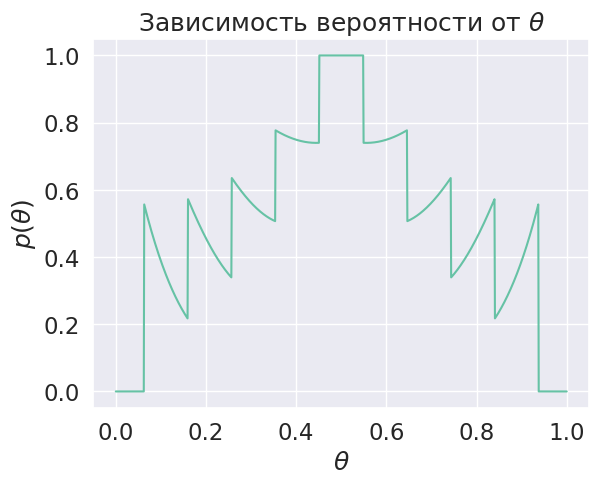

In [44]:
plt.plot(np.linspace(0, 1, 1000), p(n))
plt.title('Зависимость вероятности от $\\theta$')
plt.xlabel('$\\theta$')
plt.ylabel('$p(\\theta)$')
plt.show()

In [40]:
sample = np.random.uniform(0, 1, 1000)
print('%.3f' % np.mean(p(n)[(sample * 1000).astype('int')]))

0.515


<b><font color="#00b565" size="5">Исправил выводы</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> Нет сравнения 2 и 3 пункта. Комм. Должны были получить похожие результаты во 2 и 3 пунктах и заметить, что мы считаем по факту одно и то же: во второрм пункте - сэмлпируя, а в 3 - теоретически.

**Ответ:** Вероятность того, что оценка Ходжеса-Лемана окажется ближе, также оказалась равна примерно $\frac{1}{2}$. Это связано с тем, что по сути мы оценили одно и то же, только разными способами - семплированием в п.2 и теоретически в п. 3.

<b><font color="#00b565" size="5">===== Конец исправлений =====</font></b>

**4.** Исследуйте, как зависит вероятность $p_*$ от размера выборки, постройте график этой зависимости. Сделайте выводы.

**Решение:**

In [45]:
n_range = np.arange(1, 101)
prob = []
for n in n_range:
    prob.append(np.mean(p(n)[(sample * 1000).astype('int')]))

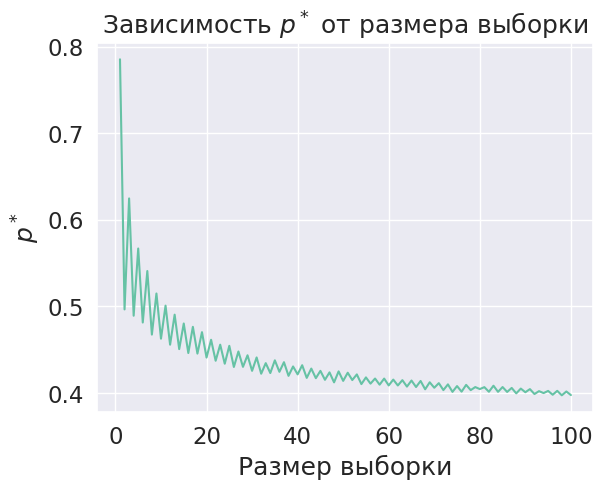

In [47]:
plt.plot(n_range, prob)
plt.title('Зависимость $p^*$ от размера выборки')
plt.xlabel('Размер выборки')
plt.ylabel('$p^*$')
plt.show()

<b><font color="#00b565" size="5">Исправил выводы</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b>  Инд. комм. Неверно посчитан график в пункте 3, что повлекло за собой неправильный пункт 4 и неправильный ответ на пункт 3

**Вывод:** с увеличением размера выборки вероятность того, что оценка Ходжеса-Лемана окажется лучше средней, убывает. В определённый момент (при $n = 9$) вероятность становится ниже $\frac{1}{2}$, и с этого момента однозначно лучше становится среднее значение. При очень больших $n$ значение вероятности стремится к некоторому значению, причём ненулевому.

<b><font color="#00b565" size="5">===== Конец исправлений =====</font></b>